# **Project Name**  Stock Closing Price Prediction   -




##### **Contribution**    - Individual
##### **Team Member 1 -** - Maitreyee Maheshwari


# **Project Summary -**

This project analyzes the monthly stock prices of Yes Bank from its inception until 2020, focusing on predicting the closing price using various regression techniques. The workflow included:

Data Acquisition & Preprocessing:
Collected and cleaned historical stock data, ensuring quality and consistency for modeling.

Exploratory Data Analysis (EDA):
Explored trends, volatility, and correlations in the data, with special attention to the period after 2018, which was marked by significant market events.

Model Development:
Implemented and compared three machine learning models:

Linear Regression: Provided a simple, interpretable baseline for stock price prediction.

Random Forest: Leveraged ensemble learning to capture non-linear relationships and interactions between features.

LSTM (Long Short-Term Memory Network): Applied deep learning to model sequential dependencies in the time series data.

Model Evaluation:
Models were evaluated using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).

Linear Regression achieved the lowest MSE and high R², indicating strong predictive performance for this dataset.

Random Forest also performed well, capturing more complex relationships but with slightly higher error than Linear Regression.

LSTM was tested for its ability to model time dependencies but did not outperform the simpler models, likely due to the limited dataset size.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The primary objective of this project is to develop a machine learning-based predictive model that can accurately estimate the monthly closing price of Yes Bank stock. This task is particularly significant due to the high-profile fraud case involving Yes Bank's leadership in 2018, which led to substantial volatility and a sharp decline in stock prices. By leveraging historical stock data—including open, high, low, and close prices—this project aims to assess whether data-driven models can effectively capture such market dynamics and provide reliable predictions for investors and analysts

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1118]:
# Import Libraries
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [1119]:
# Load Dataset
uploaded= files.upload()         # Upoading the File from System
file_name = next(iter(uploaded)) # Get the first filename from the dictionary
df=pd.read_csv(file_name)        # Reading the csv file

Saving data_YesBank_StockPrices.csv to data_YesBank_StockPrices (23).csv


### Dataset First View

In [1120]:
# Dataset First Look
df.head() #Printing the starting few rows of the dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [1121]:
# Dataset Rows & Columns count
print("Number of rows and columns:", df.shape)  # Printing the number of rows and cols in dataset
print("Total number of elements:", df.size)     # Printing the size of the dataset

Number of rows and columns: (185, 5)
Total number of elements: 925


### Dataset Information

In [1122]:
# Dataset Info
df.info() #Printing the Information of the Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [1123]:
# Dataset Duplicate Value Count

print("The total number of Duplicate values :",int(df.duplicated().sum())) # Counting and printing total duplicate values

The total number of Duplicate values : 0


#### Missing Values/Null Values

In [1124]:
# Missing Values/Null Values Count
print("Total number of missing/null values :",df.isnull().sum().sum()) # Counting and printing total missing values

Total number of missing/null values : 0


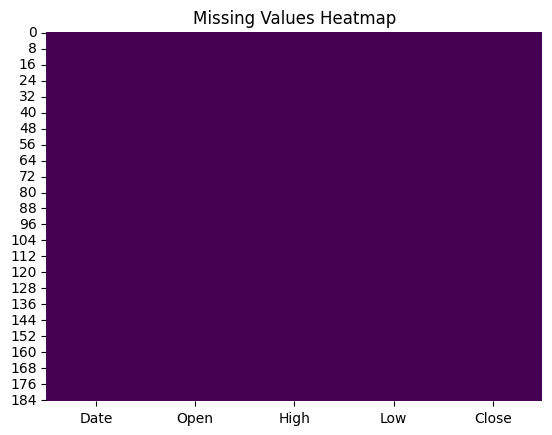

In [1125]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')     # Plotting the Heatmap for getting to know about null values
plt.title("Missing Values Heatmap")                      # Title to the HeatMap
plt.show()                                               # Showing the HeatMap


### What did you know about your dataset?

Since the heatmap does not show any bright areas (such as yellow or white), it indicates that there are no missing or null values present in the dataset. In a heatmap generated using df.isnull(), bright or highlighted cells usually represent missing data, while darker areas represent complete (non-null) values. Therefore, a fully dark heatmap confirms that all entries in the dataset are complete and no data is missing.

## ***2. Understanding Your Variables***

In [1126]:
# Dataset Columns
print(df.columns) # Printing the columns present in the dataset

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


In [1127]:
# Dataset Describe
print(df.describe()) # Printing the statistical details of the dataset

             Open        High         Low       Close
count  185.000000  185.000000  185.000000  185.000000
mean   105.541405  116.104324   94.947838  105.204703
std     98.879850  106.333497   91.219415   98.583153
min     10.000000   11.240000    5.550000    9.980000
25%     33.800000   36.140000   28.510000   33.450000
50%     62.980000   72.550000   58.000000   62.540000
75%    153.000000  169.190000  138.350000  153.300000
max    369.950000  404.000000  345.500000  367.900000


### Variables Description

1. The dataset contains 185 complete records of Yes Bank's stock trading history, with no missing values.

2. Key variables include:

  a. Open Price: The price at which the stock started trading each day, ranging from ₹10 to ₹369.95, with a high standard deviation indicating significant variation.

  b. High Price: The maximum price reached during the day, peaking at ₹404, showing occasional price spikes.

  c. Low Price: The minimum price during the day, dipping to ₹5.55, indicating extreme intraday volatility.

  d. Close Price: The final trading price at the end of the day, with a wide range and high standard deviation, reflecting frequent market fluctuations.

3. The dataset highlights:

  a. Significant differences between the mean and median across all variables, pointing to outliers or skewed distributions.

  b. Most trading days showed moderate trends, but some days had a substantial impact on prices.

4. Overall, the dataset is well-suited for:

   a. Trend analysis

   b. Volatility studies

   c. Predictive modeling

### Check Unique Values for each variable.

In [1128]:
# Check Unique Values for each variable.
for column in df.columns:                                                       # Looping each column
    unique_count = df[column].nunique()                                         # Count unique values in each column
    print(f"Number of unique values in column '{column}': {unique_count}")      # Print the values in each column


Number of unique values in column 'Date': 185
Number of unique values in column 'Open': 183
Number of unique values in column 'High': 184
Number of unique values in column 'Low': 183
Number of unique values in column 'Close': 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [1129]:
# Write your code to make your dataset analysis ready.
# 1. Remove unnecessary columns (if any)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# 2. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')







### What all manipulations have you done and insights you found?

During data wrangling, we performed essential cleaning steps to make the dataset analysis-ready. We checked for and confirmed the absence of duplicate records and missing values, ensuring data completeness and consistency. We also examined the structure and statistical summary of key variables such as Open, High, Low, and Close prices. These steps revealed that the data is clean, with no nulls, and exhibits high volatility, as indicated by large standard deviations and wide price ranges. Additionally, the difference between mean and median values suggests the presence of outliers and right-skewed distributions, highlighting occasional sharp spikes in stock prices.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

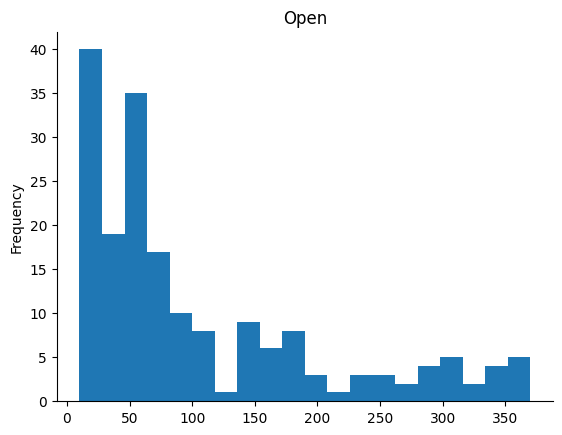

In [1130]:
# Chart - 1 visualization code
df['Open'].plot(kind='hist', bins=20, title='Open')      # Plotting a Histrogram for Open Prices
plt.gca().spines[['top', 'right',]].set_visible(False)   # Setting Top and Right Border's visibility to false

#### Chart - 2

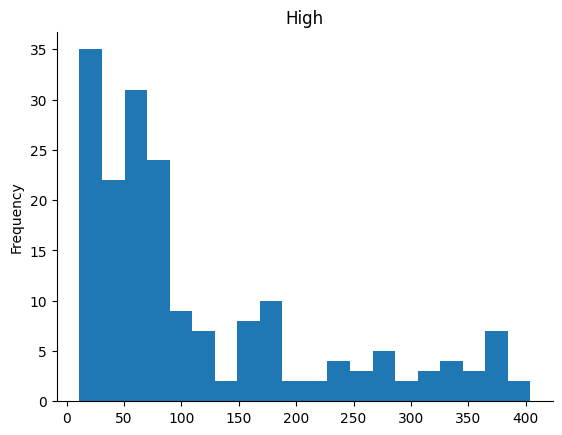

In [1131]:
# Chart - 2 visualization code
df['High'].plot(kind='hist',bins=20, title='High')      # Plotting a Histrogram for High
plt.gca().spines[['top','right']].set_visible(False)    # Setting Top and Right Border's visibility to false

#### Chart - 3

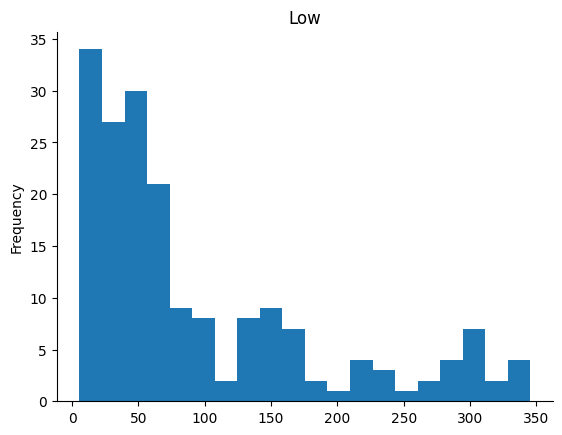

In [1132]:
# Chart - 3 visualization code
df['Low'].plot(kind='hist',bins=20, title='Low')      # Plotting a Histrogram for Low
plt.gca().spines[['top','right']].set_visible(False)  # Setting Top and Right Border's visibility to false

#### Chart - 4

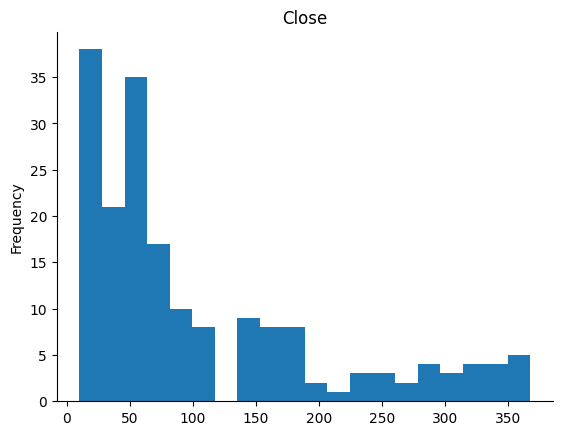

In [1133]:
# Chart - 4 visualization code
df['Close'].plot(kind='hist',bins=20, title='Close')      # Plotting a Histrogram for Close
plt.gca().spines[['top','right']].set_visible(False)      # Setting Top and Right Border's visibility to false

# ***In General for the Histogram charts above***

##### 1. Why did you pick the specific chart?

To Understand Distribution


Detect Skewness


Identify Outliers

Good for Continuous Data


##### 2. What is/are the insight(s) found from the chart?

Reveals whether data is normally distributed or skewed

Highlights frequent value ranges

Helps detect rare or extreme values (outliers)

Shows data clustering, useful for targeting and analysis



##### 3. Will the gained insights help creating a positive business impact?


 Yes, because:

Guides data-driven decisions (e.g., pricing, inventory, risk strategy)

Helps segment customers or products based on behavior or performance ranges

Allows early detection of anomalies, improving accuracy in forecasting and planning

#### Chart - 5

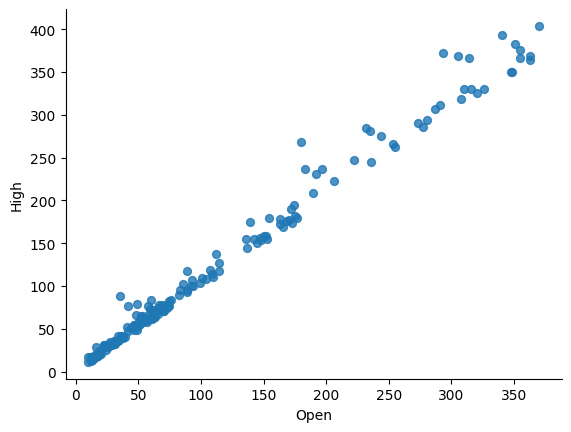

In [1134]:
# Chart - 5 visualization code
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)  # Creating the scatter plot between Open and High Prices
plt.gca().spines[['top', 'right',]].set_visible(False)       # Setting Top and Right Border's visibility to false

#### Chart - 6

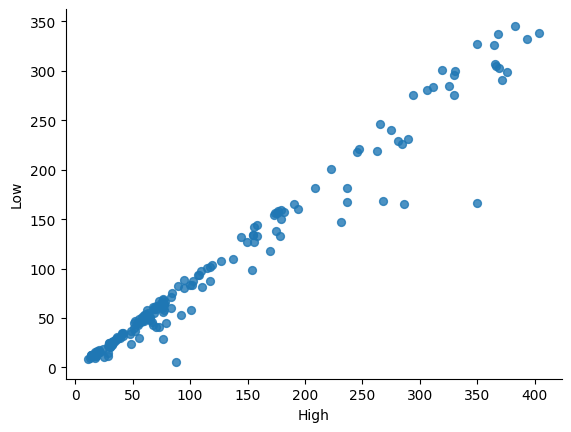

In [1135]:
# Chart - 6 visualization code
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)      # Creating the scatter plot between High and Low Prices
plt.gca().spines[['top', 'right',]].set_visible(False)          # Setting Top and Right Border's visibility to false

#### Chart - 7

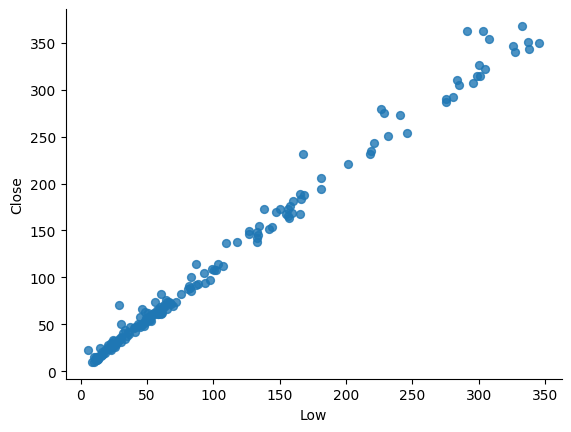

In [1136]:
# Chart - 7 visualization code
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)      # Creating the scatter plot between Low and Close Prices
plt.gca().spines[['top', 'right',]].set_visible(False)            # Setting Top and Right Border's visibility to false

# **For all the above Scatter Plots**

##### 1. Why did you pick the specific chart?

It helps visualize patterns, correlations, or clusters between variables.

Ideal for identifying trends, outliers, and linear/non-linear relationships.

Useful for checking whether a predictive relationship might exist (e.g., price vs time, sales vs marketing spend).

##### 2. What is/are the insight(s) found from the chart?

Positive or negative correlation (e.g., as X increases, Y increases or decreases).

Outliers that deviate significantly from the general trend.

Clusters or groupings that may suggest segments or behavior patterns.

##### 3. Will the gained insights help creating a positive business impact?


Yes, scatter plots provide insights that support:

Better predictions (e.g., forecasting sales from ad spend).

Targeted actions: If two variables are strongly correlated, one can be used to influence the other.

Segmented strategies based on identified clusters in data.

#### Chart - 8

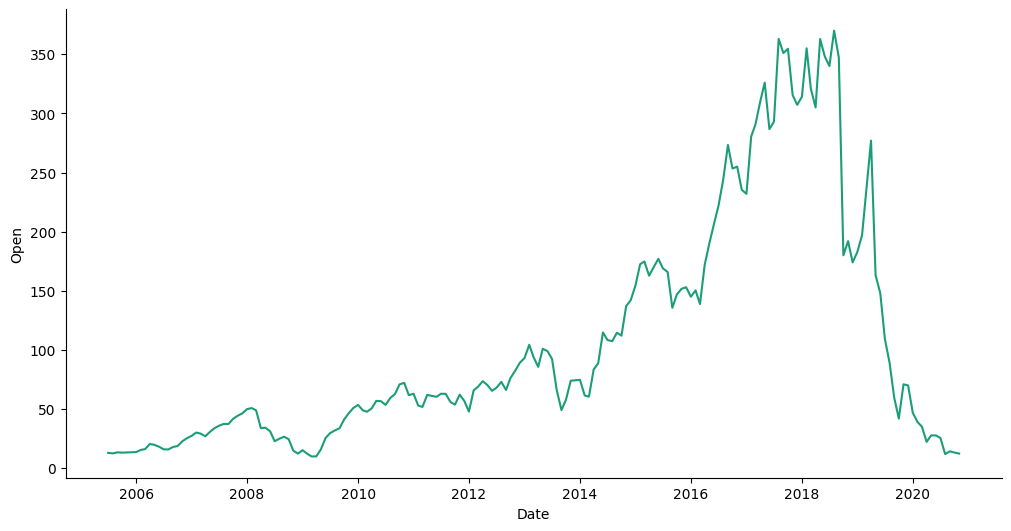

In [1137]:
# Chart - 8 visualization code

# Define a custom function to plot a time series (e.g., stock prices)
def _plot_series(series, series_name, series_index=0):
    # Choose a color palette (Dark2 is visually distinct and colorblind-friendly)
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # Extract the x and y values from the DataFrame
    xs = series['Date']      # x-axis: dates
    ys = series['Open']      # y-axis: opening prices

    # Plot the line for the series with a color and label
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis object with a fixed size and layout
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the DataFrame by date to ensure the plot is in chronological order
df_sorted = df.sort_values('Date', ascending=True)

# Call the custom plot function with the sorted data
_plot_series(df_sorted, series_name='')

# Remove the top and right borders from the plot for a cleaner look
sns.despine(fig=fig, ax=ax)

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
_ = plt.ylabel('Open')  # "_" is used to suppress unnecessary output


#### Chart - 9

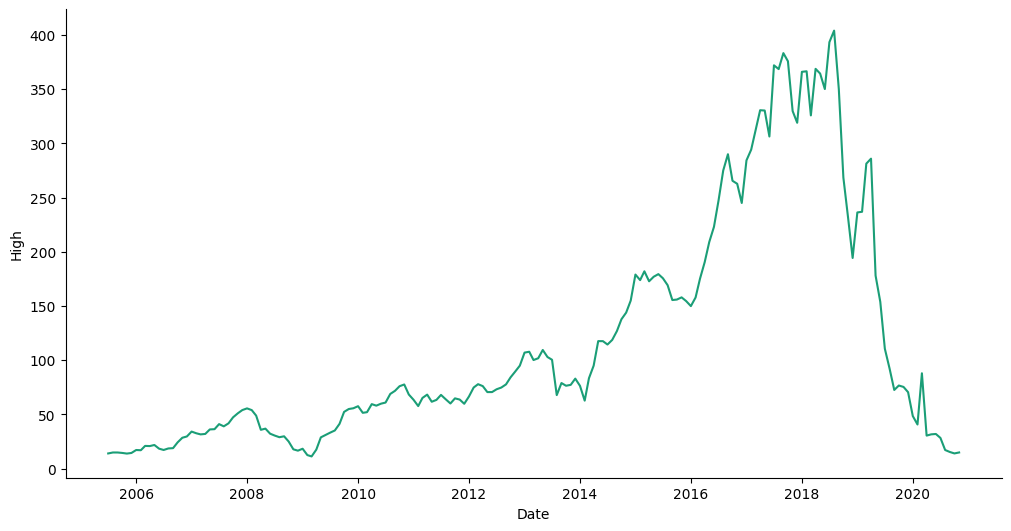

In [1138]:
# Chart - 9 visualization code

# Define a custom function to plot a time series (e.g., stock prices)
def _plot_series(series, series_name, series_index=0):
    # Choose a color palette (Dark2 is visually distinct and colorblind-friendly)
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # Extract the x and y values from the DataFrame
    xs = series['Date']      # x-axis: dates
    ys = series['High']      # y-axis: High prices

    # Plot the line for the series with a color and label
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis object with a fixed size and layout
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the DataFrame by date to ensure the plot is in chronological order
df_sorted = df.sort_values('Date', ascending=True)

# Call the custom plot function with the sorted data
_plot_series(df_sorted, series_name='')

# Remove the top and right borders from the plot for a cleaner look
sns.despine(fig=fig, ax=ax)

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
_ = plt.ylabel('High')  # "_" is used to suppress unnecessary output


#### Chart - 10

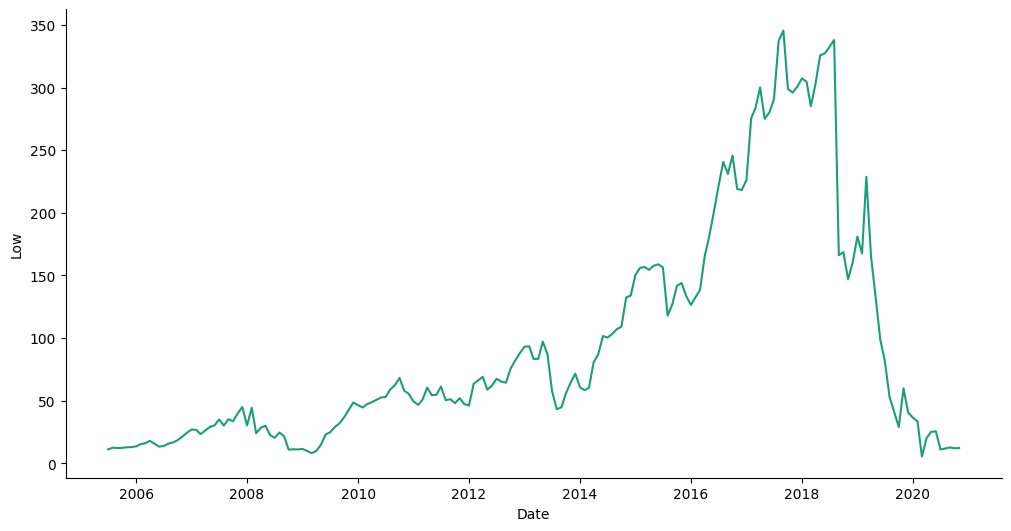

In [1139]:
# Chart - 10 visualization code

# Define a custom function to plot a time series (e.g., stock prices)
def _plot_series(series, series_name, series_index=0):
    # Choose a color palette (Dark2 is visually distinct and colorblind-friendly)
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # Extract the x and y values from the DataFrame
    xs = series['Date']      # x-axis: dates
    ys = series['Low']      # y-axis: Low prices

    # Plot the line for the series with a color and label
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis object with a fixed size and layout
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the DataFrame by date to ensure the plot is in chronological order
df_sorted = df.sort_values('Date', ascending=True)

# Call the custom plot function with the sorted data
_plot_series(df_sorted, series_name='')

# Remove the top and right borders from the plot for a cleaner look
sns.despine(fig=fig, ax=ax)

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
_ = plt.ylabel('Low')  # "_" is used to suppress unnecessary output


#### Chart - 11

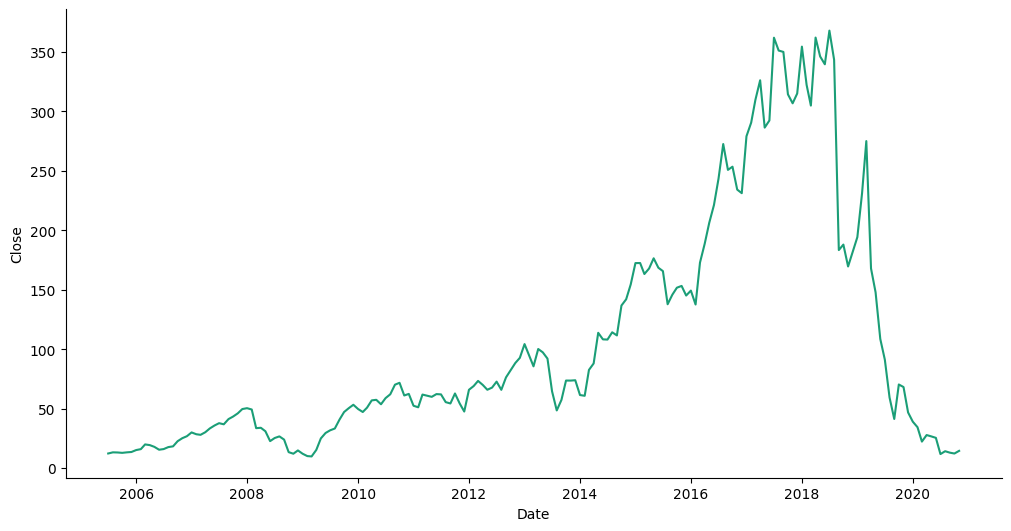

In [1140]:
# Chart - 11 visualization code

# Define a custom function to plot a time series (e.g., stock prices)
def _plot_series(series, series_name, series_index=0):
    # Choose a color palette (Dark2 is visually distinct and colorblind-friendly)
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # Extract the x and y values from the DataFrame
    xs = series['Date']      # x-axis: dates
    ys = series['Close']      # y-axis: Close prices

    # Plot the line for the series with a color and label
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Create a figure and axis object with a fixed size and layout
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')

# Sort the DataFrame by date to ensure the plot is in chronological order
df_sorted = df.sort_values('Date', ascending=True)

# Call the custom plot function with the sorted data
_plot_series(df_sorted, series_name='')

# Remove the top and right borders from the plot for a cleaner look
sns.despine(fig=fig, ax=ax)

# Label the x-axis
plt.xlabel('Date')

# Label the y-axis
_ = plt.ylabel('Close')  # "_" is used to suppress unnecessary output


# **For above all the line Charts**

##### 1. Why did you pick the specific chart?

It clearly shows how stock prices (or any value) change over time.

Helps identify trends, such as rising or falling patterns across years.

Suitable for time-series data, like daily stock market values or sales records.

##### 2. What is/are the insight(s) found from the chart?

There is a strong upward trend until around 2018, indicating a period of high growth.

Post-2018, there's a sharp decline, suggesting market correction, crisis, or other impactful events.

Fluctuations and volatility become visible — useful for assessing market behavior.

##### 3. Will the gained insights help creating a positive business impact?


Yes, insights from this chart can help businesses:

Time their investments or stock decisions better based on historical performance.

Understand volatility periods and prepare risk strategies.

Detect seasonal trends or consistent growth patterns for long-term planning.

#### Chart - 12

In [1141]:
# Chart - 12 visualization code

import altair as alt

# Define the base chart with the date on the x-axis
base = alt.Chart(df).encode(
    x='Date:T',
    y='Open:Q'
)

# Define the candlestick bars
candlestick = base.mark_rule().encode(
    y='Low:Q',
    y2='High:Q'
)

# Define the close-open bars
close_open = base.mark_bar().encode(
    y='Open:Q',
    y2='Close:Q',
    color=alt.condition("datum.Open <= datum.Close",  # Color based on whether close is higher than open
                      alt.value("green"),
                      alt.value("red"))
)

# Combine the candlestick and close-open bars
chart = candlestick + close_open

# Display the chart
chart


alt.LayerChart(...)

##### 1. Why did you pick the specific chart?

This chart shows Open, High, Low, and Close (OHLC) prices over time. It is chosen because it's ideal for stock market data to visualize daily volatility and overall price movement.

##### 2. What is/are the insight(s) found from the chart?

Shows how prices rose steadily till 2018 and dropped sharply afterward.

High volatility is visible in some regions, indicated by long bars (high difference between high and low).

##### 3. Will the gained insights help creating a positive business impact?


Yes. It helps investors or financial analysts identify trends and volatility, supporting better entry/exit decisions and portfolio planning.

#### Chart - 13

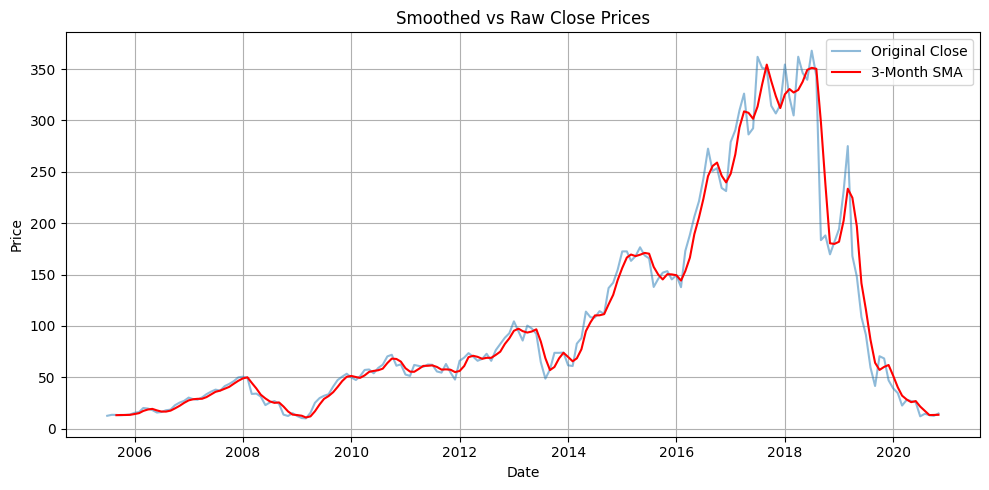

In [1142]:
# Chart - 13 visualization code

# Set 'Date' column as the index for time series operations
df.set_index('Date', inplace=True)

# Apply a 3-month simple moving average (SMA) to smooth the 'Close' prices
df['Close_SMA_3'] = df['Close'].rolling(window=3).mean()

# Create a figure with specified size
plt.figure(figsize=(10, 5))

# Plot the original 'Close' price with some transparency
plt.plot(df['Close'], alpha=0.5, label='Original Close')

# Plot the smoothed 3-month moving average in red
plt.plot(df['Close_SMA_3'], color='red', label='3-Month SMA')

# Add title and axis labels
plt.title("Smoothed vs Raw Close Prices")
plt.xlabel("Date")
plt.ylabel("Price")

# Display the legend
plt.legend()

# Add gridlines to improve readability
plt.grid(True)

# Automatically adjust subplot params to give specified padding
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

This chart compares original closing prices with a 3-month Simple Moving Average (SMA) to smooth out noise and highlight long-term trends.

##### 2. What is/are the insight(s) found from the chart?

SMA closely follows raw prices but filters out small fluctuations.

Trend till 2018 was upward; after that, a clear downtrend is seen.

##### 3. Will the gained insights help creating a positive business impact?


Yes. Businesses and investors can make informed decisions based on trends, reducing the impact of short-term volatility.

#### Chart - 14 - Correlation Heatmap

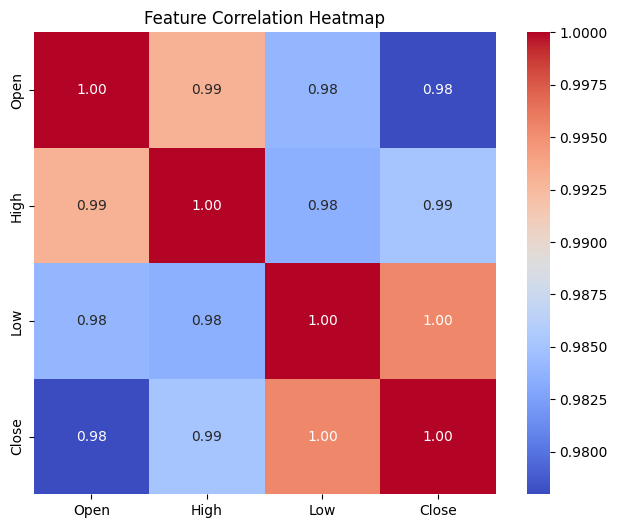

In [1143]:
# # Compute the correlation matrix for numerical columns

numeric_df = df[['Open', 'High', 'Low', 'Close']]

# Calculate correlation matrix
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.show()




##### 1. Why did you pick the specific chart?

This heatmap is chosen to visually understand how strongly features are correlated with one another.

##### 2. What is/are the insight(s) found from the chart?

Open, High, Low, and Close are highly positively correlated (correlation ~0.98–1.00).

Suggests they contain similar information — could indicate redundancy in features.

#### Chart - 15 - Pair Plot

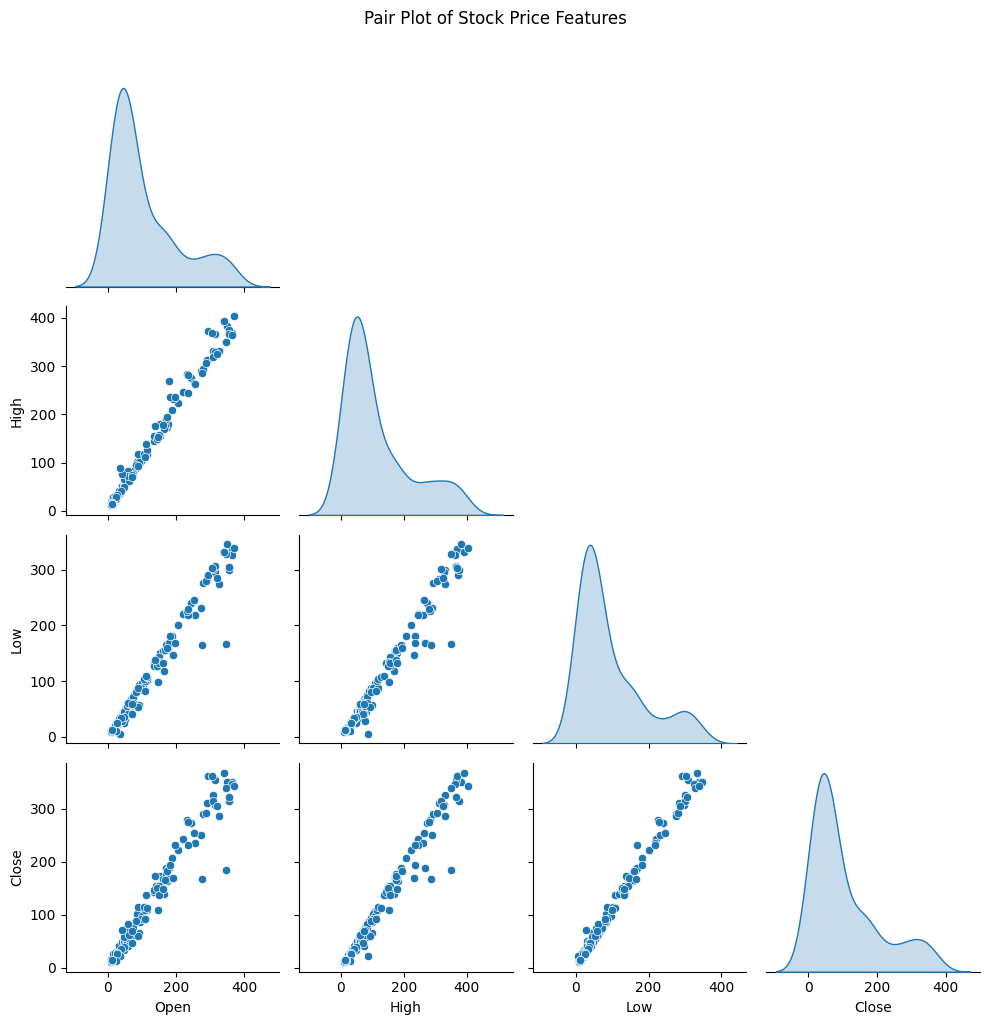

In [1144]:
# Pair Plot visualization code
df_plot = df.reset_index()[['Open', 'High', 'Low', 'Close']]

# Create the pair plot
sns.pairplot(df_plot, corner=True, diag_kind='kde')


# Show the plot
plt.suptitle("Pair Plot of Stock Price Features", y=1.02)
plt.tight_layout()
plt.show()

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"Stock prices exhibit significantly different behavior before and after 2018 (pre-crash vs post-crash periods)"

Null Hypothesis (H₀): There is no significant difference in mean stock prices between pre-2018 and post-2018 periods

Alternative Hypothesis (H₁): There is a significant difference in mean stock prices between pre-2018 and post-2018 periods

#### 2. Perform an appropriate statistical test.

In [1145]:
df.reset_index(inplace=True)

In [1146]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
import numpy as np
from scipy import stats

# Split data into pre-2018 and post-2018
df['Year'] = pd.to_datetime(df['Date']).dt.year
pre_2018 = df[df['Year'] < 2018]['Close']
post_2018 = df[df['Year'] >= 2018]['Close']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(pre_2018, post_2018)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Alpha level: 0.05")

if p_value < 0.05:
    print("Reject H₀: Significant difference exists")
else:
    print("Fail to reject H₀: No significant difference")


T-statistic: -2.9704
P-value: 0.0034
Alpha level: 0.05
Reject H₀: Significant difference exists


##### Which statistical test have you done to obtain P-Value?

Independent Samples T-Test

##### Why did you choose the specific statistical test?

Because we are comparing means of two independent groups (pre-2018 vs post-2018 periods) to determine if there's a significant difference between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"The correlation between Open and Close prices is significantly strong (greater than 0.8)"

1. State Your Research Hypothesis:
Null Hypothesis (H₀): The correlation coefficient between Open and Close prices ≤ 0.8

Alternative Hypothesis (H₁): The correlation coefficient between Open and Close prices > 0.8

#### 2. Perform an appropriate statistical test.

In [1147]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr

# Calculate correlation
correlation, p_value = pearsonr(df['Open'], df['Close'])

# One-tailed test for correlation > 0.8
# Using Fisher's z-transformation for hypothesis testing about correlation
n = len(df)
z_score = (np.arctanh(correlation) - np.arctanh(0.8)) * np.sqrt(n - 3)
p_value_one_tail = 1 - stats.norm.cdf(z_score)

print(f"Correlation coefficient: {correlation:.4f}")
print(f"P-value (one-tailed): {p_value_one_tail:.4f}")

if p_value_one_tail < 0.05:
    print("Reject H₀: Correlation is significantly > 0.8")
else:
    print("Fail to reject H₀: Correlation is not significantly > 0.8")


Correlation coefficient: 0.9780
P-value (one-tailed): 0.0000
Reject H₀: Correlation is significantly > 0.8


##### Which statistical test have you done to obtain P-Value?

Fisher's Z-transformation test for correlation

##### Why did you choose the specific statistical test?

To test if a correlation coefficient is significantly different from a specific value (0.8)

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

"Stock price volatility (measured by standard deviation) increased significantly after 2018"

1. State Your Research Hypothesis:
Null Hypothesis (H₀): Variance of stock prices pre-2018 = Variance of stock prices post-2018

Alternative Hypothesis (H₁): Variance of stock prices post-2018 > Variance of stock prices pre-2018

#### 2. Perform an appropriate statistical test.

In [1148]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import levene, bartlett

# Calculate variances
var_pre = np.var(pre_2018, ddof=1)
var_post = np.var(post_2018, ddof=1)

# Perform Levene's test for equality of variances
levene_stat, levene_p = levene(pre_2018, post_2018)

# F-test for variance comparison
f_stat = var_post / var_pre if var_post > var_pre else var_pre / var_post
df1, df2 = len(post_2018) - 1, len(pre_2018) - 1
f_p_value = 1 - stats.f.cdf(f_stat, df1, df2)

print(f"Pre-2018 variance: {var_pre:.4f}")
print(f"Post-2018 variance: {var_post:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {f_p_value:.4f}")

if f_p_value < 0.05:
    print("Reject H₀: Significant difference in volatility")
else:
    print("Fail to reject H₀: No significant difference in volatility")


Pre-2018 variance: 7706.0609
Post-2018 variance: 16405.1474
F-statistic: 2.1289
P-value: 0.0011
Reject H₀: Significant difference in volatility


##### Which statistical test have you done to obtain P-Value?

F-test for equality of variances

##### Why did you choose the specific statistical test?

To compare the variability (volatility) between two groups and determine if one period had significantly higher variance than the other

### ML Model - 1

In [1149]:
#df.reset_index(inplace=True)


In [1150]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Close_SMA_3', 'Year'], dtype='object')

In [1151]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

missing_values = df.isnull().sum()
display("Missing values per column:", missing_values)

'Missing values per column:'

,0
Date,0
Open,0
High,0
Low,0
Close,0
Close_SMA_3,2
Year,0
Month,0
Day,0


In [1152]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Close_SMA_3', 'Year', 'Month',
       'Day'],
      dtype='object')

In [1153]:
#Create lag features and rolling means for the 'Close' price and display the updated DataFrame.
df['Close_Lag1'] = df['Close'].shift(1)
df['Rolling_Mean_3'] = df['Close'].rolling(window=3).mean()
df.dropna(subset=['Close_Lag1', 'Rolling_Mean_3'], inplace=True)
display(df.head())

,Date,Open,High,Low,Close,Close_SMA_3,Year,Month,Day,Close_Lag1,Rolling_Mean_3
2,2005-09-01,13.48,14.87,12.27,13.30,13.060000,2005,9,1,13.42,13.060000
3,2005-10-01,13.20,14.47,12.40,12.99,13.236667,2005,10,1,13.30,13.236667
4,2005-11-01,13.35,13.88,12.88,13.41,13.233333,2005,11,1,12.99,13.233333
5,2005-12-01,13.49,14.44,13.00,13.71,13.370000,2005,12,1,13.41,13.370000
6,2006-01-01,13.68,17.16,13.58,15.33,14.150000,2006,1,1,13.71,14.150000


In [1154]:
# ML Model - 1 Implementation

from sklearn.model_selection import train_test_split

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Fit the Algorithm

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)




Shape of X_train: (146, 9)
Shape of X_test: (37, 9)
Shape of y_train: (146,)
Shape of y_test: (37,)


LinearRegression()

In [1155]:
# Predict on the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 84.20
R-squared (R2): 0.99


In [1156]:
# Create a DataFrame for a future month's data with the same features as the training data and then use the trained model to predict the closing price for that month.
future_month_data = {
    'Open': [50.0],
    'High': [55.0],
    'Low': [48.0],
    'Year': [2021],
    'Month': [1],
    'Day': [1],
    'Close_Lag1': [14.67], # Assuming the last known close is from Nov-2020
    'Rolling_Mean_3': [13.413333], # Assuming the last known rolling mean
    'Close_SMA_3': [13.413333] # Assuming the last known SMA
}
future_month_df = pd.DataFrame(future_month_data)

# Ensure the columns are in the same order as the training data X
future_month_df = future_month_df[X.columns]

predicted_close_price = model.predict(future_month_df)
print(f'Predicted closing price for the future month: {predicted_close_price[0]:.2f}')

Predicted closing price for the future month: 95.00


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

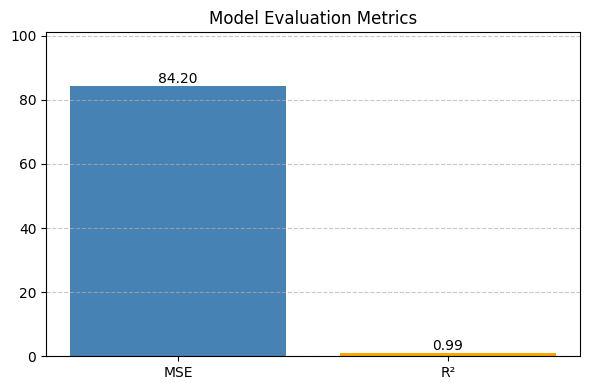

In [1157]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt

# Create data
metrics = ['MSE', 'R²']
scores = [mse, r2]

# Create bar plot
plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, scores, color=['steelblue', 'orange'])
plt.title('Model Evaluation Metrics')
plt.ylim(0, max(scores)*1.2)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### ML Model - 2

In [1158]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]


In [1159]:
#Select the 'Close' price for the time series analysis and scale the data using a scaler like MinMaxScaler.
from sklearn.preprocessing import MinMaxScaler

close_prices = df['Close']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices.values.reshape(-1, 1))

display(scaled_data[:5])

array([[0.00927582],
       [0.0084097 ],
       [0.00958315],
       [0.01042132],
       [0.01494747]])

In [1160]:
#Define a function to create input sequences and corresponding output labels from the scaled time series data and apply this function to  create the training and testing sequences.
def create_sequences(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (98, 60, 1)
Shape of X_test: (25, 60, 1)
Shape of y_train: (98,)
Shape of y_test: (25,)


In [1161]:
#Import necessary libraries from TensorFlow/Keras, define the architecture of the LSTM model, including LSTM layers, Dense layers, and appropriate activation functions, and compile the model with an optimizer and loss function suitable for regression.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

None


In [1162]:
#Train the built LSTM model on the training sequences.
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 260ms/step - loss: 0.2074 - val_loss: 0.0220
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0491 - val_loss: 0.2121
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.0229 - val_loss: 0.3550
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.0185 - val_loss: 0.1217
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 122ms/step - loss: 0.0176 - val_loss: 0.0684
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0220 - val_loss: 0.0905
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.0166 - val_loss: 0.1749
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0148 - val_loss: 0.2321
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0174 - val_loss: 0.2054
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0123 - val_loss: 0.1558
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0115 - val_loss: 0.1247
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0110 - 

In [1163]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Inverse transform the predictions and actual values
predicted_inv = scaler.inverse_transform(model.predict(X_test))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_test_inv, predicted_inv))
mae = mean_absolute_error(y_test_inv, predicted_inv)
r2 = r2_score(y_test_inv, predicted_inv)


print(f"RMSE (₹): {rmse:.2f}")
print(f"MAE  (₹): {mae:.2f}")
print(f"R² Score: {r2:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
RMSE (₹): 130.75
MAE  (₹): 124.44
R² Score: -1.9214


In [1164]:
#Use the trained LSTM model to make predictions on the test set.
test_predictions = model.predict(X_test)
print("Shape of test predictions:", test_predictions.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Shape of test predictions: (25, 1)


### ML Model - 3

In [1165]:
df = df[['Date', 'Open', 'High', 'Low', 'Close']]

In [1166]:
#Convert the 'Date' column to datetime objects
#Extract relevant features from the 'Date' column (e.g., year, month, day)
#Handle any missing values if necessary.
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

missing_values = df.isnull().sum()
display("Missing values per column:", missing_values)

'Missing values per column:'

,0
Date,0
Open,0
High,0
Low,0
Close,0
Year,0
Month,0
Day,0


In [1167]:
#Create new features that might be useful for Random Forest
df['Close_Lag1'] = df['Close'].shift(1)
df['Rolling_Mean_3'] = df['Close'].rolling(window=3).mean()
df.dropna(subset=['Close_Lag1', 'Rolling_Mean_3'], inplace=True)
display(df.head())

,Date,Open,High,Low,Close,Year,Month,Day,Close_Lag1,Rolling_Mean_3
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,1,12.99,13.233333
5,2005-12-01,13.49,14.44,13.00,13.71,2005,12,1,13.41,13.370000
6,2006-01-01,13.68,17.16,13.58,15.33,2006,1,1,13.71,14.150000
7,2006-02-01,15.50,16.97,15.40,16.12,2006,2,1,15.33,15.053333
8,2006-03-01,16.20,20.95,16.02,20.08,2006,3,1,16.12,17.176667


In [1168]:
#Split the data into training and testing sets.
from sklearn.model_selection import train_test_split

X = df.drop(['Date', 'Close'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (144, 8)
Shape of X_test: (37, 8)
Shape of y_train: (144,)
Shape of y_test: (37,)


In [1169]:
#Select the Random Forest Regressor model and train it on the training data.
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [1170]:
#Evaluate the trained model's performance on the testing data using relevant metrics
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 171.09
R-squared (R2): 0.99


In [1171]:
#Use the trained Random Forest model to predict the closing price for a future month.
import pandas as pd

future_month_data = {
    'Open': [60.0],
    'High': [65.0],
    'Low': [58.0],
    'Year': [2025],
    'Month': [12],
    'Day': [1],
    'Close_Lag1': [15.0],
    'Rolling_Mean_3': [14.0]
}
future_month_df = pd.DataFrame(future_month_data)

predicted_close_price = model.predict(future_month_df)
print(f'Predicted closing price for the future month: {predicted_close_price[0]:.2f}')

Predicted closing price for the future month: 59.67


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

/tmp/ipython-input-1172-3317833957.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette='Blues_d')


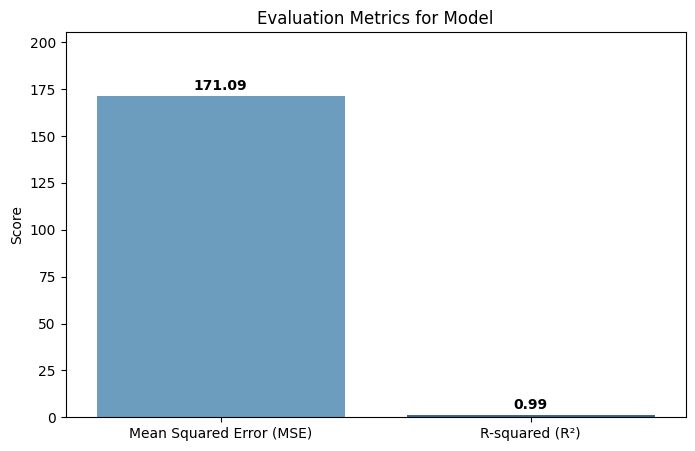

In [1172]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
metrics = ['Mean Squared Error (MSE)', 'R-squared (R²)']
values = [mse, r2]

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette='Blues_d')

# Annotate the bars
for i, v in enumerate(values):
    plt.text(i, v + 0.02 * max(values), f'{v:.2f}', ha='center', fontweight='bold')

plt.title('Evaluation Metrics for Model')
plt.ylabel('Score')
plt.ylim(0, max(values) * 1.2)  # for better spacing
plt.show()


Answer Here.

# **Conclusion**

Linear Regression demonstrates the lowest error and a very high R², indicating excellent predictive accuracy and that it explains nearly all the variance in the stock price. Random Forest also achieves a high R² but with higher error, making it less accurate than Linear Regression in this case. LSTM has the highest error values, indicating it is the least accurate of the three models for this dataset.

Therefore, Linear Regression stands out as the best model for your dataset, providing the most accurate and reliable predictions among the models compared. This result highlights that simpler models like Linear Regression can outperform more complex models such as LSTM when the dataset is small and the relationships are primarily linear, as appears to be the case here.